In [1]:
!sudo pip3 install -U -q PyMySQL sqlalchemy sql_magic

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
from sqlalchemy import text

In [3]:
DB_NAME = 'public'
table_song_mood = 'weatherBeats_songToMood'
table_song_info = 'weatherBeats_spotify_w_url'

In [4]:
conn_string = "mysql+pymysql://{user}:{password}@{host}/{db}?charset=utf8mb4".format(
    host="db.ipeirotis.org",
    user="student",
    password="dwdstudent2015",
    db = DB_NAME,
    encoding = 'utf8mb4')

engine = create_engine(conn_string)

In [5]:

def getSQLData(table_name):

  sql = f'''
      SELECT * FROM {table_name}
  '''

  with engine.connect() as connection:
    df = pd.read_sql(text(sql), con=connection)

  return df

In [6]:
df_mood = getSQLData(table_song_mood)
df_mood

,song_name,artist_name,genre,mood
0,"...And To Those I Love, Thanks For Sticking Ar...",$uicideboy$,Underground Rap,Melancholic
1,"...And To Those I Love, Thanks For Sticking Ar...",$uicideboy$,Underground Rap,Sad
2,(NYB) Need Your Best,Jadakiss,Hiphop,Contemplative
3,(NYB) Need Your Best,Jadakiss,Hiphop,Energetic
4,@ MEH,Playboi Carti,Underground Rap,Energetic
...,...,...,...,...
2512,Where the Party At (feat. Nelly),Jagged Edge,RnB,Joyful
2513,Wherever I Go,OneRepublic,Emo,Melancholic
2514,Wherever I Go,OneRepublic,Emo,Sad
2515,Whip (feat. Travis Scott),2 Chainz,Rap,Energetic


In [7]:
df_info = getSQLData(table_song_info)
df_info

,song_name,artist_name,genre,danceability,energy,key_,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri
0,"...And To Those I Love, Thanks For Sticking Ar...",$uicideboy$,Underground Rap,0.792,0.512,2,-6.875,0.0408,0.1300,0.000088,0.1400,0.1100,113.978,spotify:track:41LhQUkElADQ5YUbpYv2D0
1,'Till I Collapse,Eminem,Hiphop,0.551,0.851,1,-3.277,0.1970,0.0748,0.000000,0.0784,0.1000,171.411,spotify:track:6yr8GiTHWvFfi4o6Q5ebdT
2,(NYB) Need Your Best,Jadakiss,Hiphop,0.585,0.721,6,-4.805,0.2300,0.1640,0.000000,0.2320,0.8020,157.092,spotify:track:48MBW7efxZIVdwiZw1aFrG
3,@ MEH,Playboi Carti,Underground Rap,0.876,0.492,11,-8.110,0.1530,0.0136,0.000283,0.0678,0.4000,151.044,spotify:track:5UusfWUMMLEXLMc1ViNZoe
4,• TEMPTED,Squeeze,Hiphop,0.844,0.488,4,-7.834,0.2550,0.0572,0.000000,0.2090,0.2980,204.022,spotify:track:7pQi9lwATNWDfNwtyMXUtm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,ZETSUMEI,Kuhakugokko,Trap Metal,0.521,0.985,6,-7.312,0.4870,0.4300,0.000000,0.1900,0.0389,153.556,spotify:track:38bbjy807liIqjNKp331h4
1438,Zombie (feat. NLE Choppa & DB Omerta),Kodak Black,Underground Rap,0.823,0.659,1,-3.619,0.1790,0.4310,0.000000,0.0868,0.4520,149.998,spotify:track:6vn5wV2qwx5sengy1kZHnJ
1439,Zoom (Nascar!),NASCAR P 13k,Dark Trap,0.648,0.632,7,-7.820,0.0696,0.6700,0.000232,0.1210,0.1570,162.066,spotify:track:0zDE7rMScrdsH75he3uEiu
1440,"Дико, например",PHARAOH,Underground Rap,0.891,0.624,6,-6.636,0.0789,0.1140,0.007110,0.1040,0.0840,180.146,spotify:track:3dzwxkefk58p6aXC3ADRt9


In [8]:
df_info.columns

Index(['song_name', 'artist_name', 'genre', 'danceability', 'energy', 'key_',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'uri'],
      dtype='object')

In [9]:
# Extract relevant columns from the second dataframe
df_extracted = df_info[['song_name', 'danceability', 'energy', 'key_', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
df_extracted


,song_name,danceability,energy,key_,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,"...And To Those I Love, Thanks For Sticking Ar...",0.792,0.512,2,-6.875,0.0408,0.1300,0.000088,0.1400,0.1100,113.978
1,'Till I Collapse,0.551,0.851,1,-3.277,0.1970,0.0748,0.000000,0.0784,0.1000,171.411
2,(NYB) Need Your Best,0.585,0.721,6,-4.805,0.2300,0.1640,0.000000,0.2320,0.8020,157.092
3,@ MEH,0.876,0.492,11,-8.110,0.1530,0.0136,0.000283,0.0678,0.4000,151.044
4,• TEMPTED,0.844,0.488,4,-7.834,0.2550,0.0572,0.000000,0.2090,0.2980,204.022
...,...,...,...,...,...,...,...,...,...,...,...
1437,ZETSUMEI,0.521,0.985,6,-7.312,0.4870,0.4300,0.000000,0.1900,0.0389,153.556
1438,Zombie (feat. NLE Choppa & DB Omerta),0.823,0.659,1,-3.619,0.1790,0.4310,0.000000,0.0868,0.4520,149.998
1439,Zoom (Nascar!),0.648,0.632,7,-7.820,0.0696,0.6700,0.000232,0.1210,0.1570,162.066
1440,"Дико, например",0.891,0.624,6,-6.636,0.0789,0.1140,0.007110,0.1040,0.0840,180.146


In [10]:
df_mood_unique = df_mood.drop_duplicates(subset=['song_name'])

In [11]:
df_mood_unique

,song_name,artist_name,genre,mood
0,"...And To Those I Love, Thanks For Sticking Ar...",$uicideboy$,Underground Rap,Melancholic
2,(NYB) Need Your Best,Jadakiss,Hiphop,Contemplative
4,@ MEH,Playboi Carti,Underground Rap,Energetic
6,00101111 01001101 01001001 01000001,OmenXIII,Dark Trap,Gloomy
8,1 Thot 2 Thot Red Thot Blue Thot,Yung Gravy,RnB,Energetic
...,...,...,...,...
2507,When You See My Friends,Mayday Parade,Emo,Melancholic
2509,Where Does The Time Go (feat. Joji),Rich Brian,Underground Rap,Contemplative
2511,Where the Party At (feat. Nelly),Jagged Edge,RnB,Energetic
2513,Wherever I Go,OneRepublic,Emo,Melancholic


In [12]:
merged_df = pd.merge(
                    df_extracted,
                    df_mood_unique,
                    on="song_name",
                    how="left"
          )

In [13]:
merged_df = merged_df.dropna()

In [14]:
merged_df

,song_name,danceability,energy,key_,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,genre,mood
0,"...And To Those I Love, Thanks For Sticking Ar...",0.792,0.512,2,-6.875,0.0408,0.13000,0.000088,0.1400,0.1100,113.978,$uicideboy$,Underground Rap,Melancholic
2,(NYB) Need Your Best,0.585,0.721,6,-4.805,0.2300,0.16400,0.000000,0.2320,0.8020,157.092,Jadakiss,Hiphop,Contemplative
3,@ MEH,0.876,0.492,11,-8.110,0.1530,0.01360,0.000283,0.0678,0.4000,151.044,Playboi Carti,Underground Rap,Energetic
6,00101111 01001101 01001001 01000001,0.584,0.485,0,-10.937,0.0418,0.83400,0.000014,0.1090,0.0339,120.046,OmenXIII,Dark Trap,Gloomy
8,1 Thot 2 Thot Red Thot Blue Thot,0.766,0.737,3,-8.312,0.1670,0.09550,0.032700,0.0719,0.7040,159.990,Yung Gravy,RnB,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,When You See My Friends,0.228,0.753,1,-4.132,0.0370,0.00149,0.000000,0.1080,0.2910,170.878,Mayday Parade,Emo,Melancholic
1376,Where Does The Time Go (feat. Joji),0.642,0.553,2,-6.573,0.0265,0.18400,0.000010,0.1120,0.1290,139.925,Rich Brian,Underground Rap,Contemplative
1377,Where the Party At (feat. Nelly),0.596,0.661,5,-6.239,0.2260,0.31000,0.000000,0.0847,0.8600,129.491,Jagged Edge,RnB,Energetic
1378,Wherever I Go,0.538,0.621,5,-3.358,0.0270,0.03830,0.000000,0.0976,0.3720,158.048,OneRepublic,Emo,Melancholic


In [15]:
df_lyrics = getSQLData("weatherBeats_Spotify_w_lyrics")

# Input

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical labels
label_encoder = LabelEncoder()
merged_df['encoded_mood'] = label_encoder.fit_transform(merged_df['mood'])

# storing the mapping
mapping = dict(zip(merged_df['encoded_mood'], merged_df['mood']))

# Encoding categorical labels for 'genre'
merged_df['genre'] = label_encoder.fit_transform(merged_df['genre'])

# Feature columns and target column
features = merged_df[['danceability', 'energy', 'key_', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'genre']]
target = merged_df['encoded_mood']

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Define a custom dataset
class MoodDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

# Create data loaders
train_dataset = MoodDataset(X_train_tensor, y_train_tensor)
test_dataset = MoodDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Random Forest Classifier

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
features_resampled, target_resampled = oversampler.fit_resample(features_scaled, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_resampled, target_resampled, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 94.29%


## Predicting mood

In [19]:
predicted_labels = rf_classifier.predict(features_scaled)
preds = []
for i in range(len(predicted_labels)):
  preds.append(mapping[predicted_labels[i]])

In [20]:
np.unique(preds)

array(['Aggressive', 'Angry', 'Anxious', 'Calm', 'Confident',
       'Contemplative', 'Content', 'Dreary', 'Empowered', 'Empowering',
       'Energetic', 'Gloomy', 'Intimate', 'Melancholic', 'Moody',
       'Mysterious', 'Passionate'], dtype='<U13')

# Applying this model to predict the moods of the song for the entire dataset.

In [21]:
# Read from SQL
def getSongData(table_name):

  sql_comm = f'''
              SELECT * FROM {table_name}
            '''

  with engine.connect() as connection:
    df = pd.read_sql(text(sql_comm), con=connection)

  return df

In [22]:
df_data = getSongData("weatherBeats_spotify_data_9k")
df_data

,song_name,artist_name,danceability,energy,key_,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,url,genre
0,-lifeline-,Rick Astley,0.689,0.483,8,-9.077,0.0532,0.010300,0.847000,0.0692,0.2820,115.024,https://open.spotify.com/track/4PTG3Z6ehGkBFwj...,Dark Trap
1,?,Rick Astley,0.532,0.629,10,-7.955,0.3710,0.260000,0.000000,0.4780,0.5450,188.060,https://open.spotify.com/track/4PTG3Z6ehGkBFwj...,Hiphop
2,???????,Rick Astley,0.676,0.843,7,-6.365,0.0773,0.001220,0.000000,0.1200,0.0373,160.017,https://open.spotify.com/track/4PTG3Z6ehGkBFwj...,Dark Trap
3,... i still hate rappers,goth,0.380,0.846,5,-2.087,0.3480,0.003330,0.003040,0.6890,0.3870,158.193,https://open.spotify.com/track/7ak3daCmGDMTa1D...,Trap Metal
4,... i still hate rappers (snippet) (+sellgarage),Rick Astley,0.380,0.846,5,-2.087,0.3480,0.003330,0.003040,0.6890,0.3870,158.193,https://open.spotify.com/track/4PTG3Z6ehGkBFwj...,Trap Metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15119,Яма,IC3PEAK,0.616,0.465,0,-9.338,0.0310,0.097900,0.003200,0.0878,0.0460,212.140,https://open.spotify.com/track/0IhmRkTZRvHFnYN...,Trap Metal
15120,המוסד,La Coka Nostra,0.592,0.934,2,-4.611,0.0795,0.000734,0.000052,0.1160,0.3320,179.954,https://open.spotify.com/track/4JZPpdcRWfAKK5n...,Underground Rap
15121,행복,Red Velvet,0.726,0.436,1,-6.783,0.0956,0.072100,0.872000,0.1070,0.3920,159.968,https://open.spotify.com/track/6XP9L7di5JnOc9W...,Dark Trap
15122,ムスティネ,Rick Astley,0.834,0.414,1,-16.159,0.3580,0.000406,0.000557,0.0843,0.2310,179.840,https://open.spotify.com/track/4PTG3Z6ehGkBFwj...,Dark Trap


We get the predicted moods from this

In [23]:
# Encoding categorical labels
label_encoder = LabelEncoder()
# Encoding categorical labels for 'genre'
df_data['genre'] = label_encoder.fit_transform(df_data['genre'])

features_pred = df_data[['danceability', 'energy', 'key_', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'genre']]

# predicting the mood
predictions = rf_classifier.predict(features_pred)

preds = []
for i in range(len(predictions)):
  preds.append(mapping[predictions[i]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [30]:
df_data['genre'] = label_encoder.inverse_transform(df_data['genre'])

In [31]:
df_data['mood'] = preds

In [32]:
df_data['mood'].unique()

array(['Contemplative', 'Calm', 'Passionate', 'Energetic'], dtype=object)

In [33]:
df_data

,song_name,artist_name,danceability,energy,key_,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,url,genre,mood
0,-lifeline-,Rick Astley,0.689,0.483,8,-9.077,0.0532,0.010300,0.847000,0.0692,0.2820,115.024,https://open.spotify.com/track/4PTG3Z6ehGkBFwj...,Dark Trap,Contemplative
1,?,Rick Astley,0.532,0.629,10,-7.955,0.3710,0.260000,0.000000,0.4780,0.5450,188.060,https://open.spotify.com/track/4PTG3Z6ehGkBFwj...,Hiphop,Contemplative
2,???????,Rick Astley,0.676,0.843,7,-6.365,0.0773,0.001220,0.000000,0.1200,0.0373,160.017,https://open.spotify.com/track/4PTG3Z6ehGkBFwj...,Dark Trap,Calm
3,... i still hate rappers,goth,0.380,0.846,5,-2.087,0.3480,0.003330,0.003040,0.6890,0.3870,158.193,https://open.spotify.com/track/7ak3daCmGDMTa1D...,Trap Metal,Contemplative
4,... i still hate rappers (snippet) (+sellgarage),Rick Astley,0.380,0.846,5,-2.087,0.3480,0.003330,0.003040,0.6890,0.3870,158.193,https://open.spotify.com/track/4PTG3Z6ehGkBFwj...,Trap Metal,Contemplative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15119,Яма,IC3PEAK,0.616,0.465,0,-9.338,0.0310,0.097900,0.003200,0.0878,0.0460,212.140,https://open.spotify.com/track/0IhmRkTZRvHFnYN...,Trap Metal,Contemplative
15120,המוסד,La Coka Nostra,0.592,0.934,2,-4.611,0.0795,0.000734,0.000052,0.1160,0.3320,179.954,https://open.spotify.com/track/4JZPpdcRWfAKK5n...,Underground Rap,Contemplative
15121,행복,Red Velvet,0.726,0.436,1,-6.783,0.0956,0.072100,0.872000,0.1070,0.3920,159.968,https://open.spotify.com/track/6XP9L7di5JnOc9W...,Dark Trap,Contemplative
15122,ムスティネ,Rick Astley,0.834,0.414,1,-16.159,0.3580,0.000406,0.000557,0.0843,0.2310,179.840,https://open.spotify.com/track/4PTG3Z6ehGkBFwj...,Dark Trap,Contemplative


We store the appropriate tables as required by our web app

In [37]:
def delete_table(table_name):

  drop_table_query = f"DROP TABLE IF EXISTS {table_name}"

  with engine.connect() as connection:
    connection.execute(text(drop_table_query))

def create_table_mood(table_name):

  create_table_query = f"""CREATE TABLE IF NOT EXISTS {table_name}
                                  (song_name varchar(255),
                                  artist_name varchar(255),
                                  genre varchar(255),
                                  mood varchar(255),

                                  PRIMARY KEY (song_name, artist_name)
                                  )"""

  with engine.connect() as connection:
    connection.execute(text(create_table_query))

def add_to_db_mood(df, table_name):

  insert_query = f"""
                      INSERT IGNORE INTO
                      {table_name}(song_name, artist_name, genre, mood)

                      VALUES (:song_name, :artist_name, :genre, :mood)
                    """

  with engine.connect() as connection:

    for _, row in df.iterrows():

      if row.isna().sum() > 0:
        artist_name = 'unknown'
      else:
        artist_name = row["artist_name"]

      query_parameters = {
          "song_name": row["song_name"],
          "artist_name": artist_name,
          "genre": row['genre'],
          "mood": row['mood'],
      }
      print(f'Inserting {row["song_name"]} by {artist_name} with mood {row["mood"]}')

      connection.execute(text(insert_query), query_parameters)

    connection.commit() # Save the data on disk

In [38]:
TABLE_NAME = "weatherBeats_songToMood_ML"

In [39]:
delete_table(TABLE_NAME)

create_table_mood(TABLE_NAME)

add_to_db_mood(df_data, TABLE_NAME)

Streaming output truncated to the last 5000 lines.
Inserting PMW (All I Really Need) (feat. ScHoolboy Q) by A$AP Rocky with mood Contemplative
Inserting PNEUMA by TOOL with mood Calm
Inserting Pneumonia by Danny Brown with mood Contemplative
Inserting Po Nigga Blues - Scott Storch Remix (Explicit) by 2Pac with mood Contemplative
Inserting Po'ed Up (feat. Gunna) by Rick Astley with mood Contemplative
Inserting PocketRocket by Fat Nick with mood Contemplative
Inserting Pockets Thick by Soulzay with mood Contemplative
Inserting Poe the Drop (feat. Future) by Shoreline Mafia with mood Contemplative
Inserting Poe'd Up by Rick Astley with mood Contemplative
Inserting Poetic Justice by Kendrick Lamar with mood Contemplative
Inserting Poets by Bryan Martin with mood Calm
Inserting Point of No Return by STARSET with mood Contemplative
Inserting Poison by Brent Faiyaz with mood Contemplative
Inserting POISON KLAN by PlayThatBoiZay with mood Contemplative
Inserting Poker Face by Lady Gaga with mo

In [40]:
# TESTING
df_ret = getSongData(TABLE_NAME)
df_ret

,song_name,artist_name,genre,mood
0,-lifeline-,Rick Astley,Dark Trap,Contemplative
1,?,Rick Astley,Hiphop,Contemplative
2,???????,Rick Astley,Dark Trap,Calm
3,... i still hate rappers,goth,Trap Metal,Contemplative
4,... i still hate rappers (snippet) (+sellgarage),Rick Astley,Trap Metal,Contemplative
...,...,...,...,...
15119,Яма,IC3PEAK,Trap Metal,Contemplative
15120,המוסד,La Coka Nostra,Underground Rap,Contemplative
15121,행복,Red Velvet,Dark Trap,Contemplative
15122,ムスティネ,Rick Astley,Dark Trap,Contemplative


# t-SNE Cluster Visualization

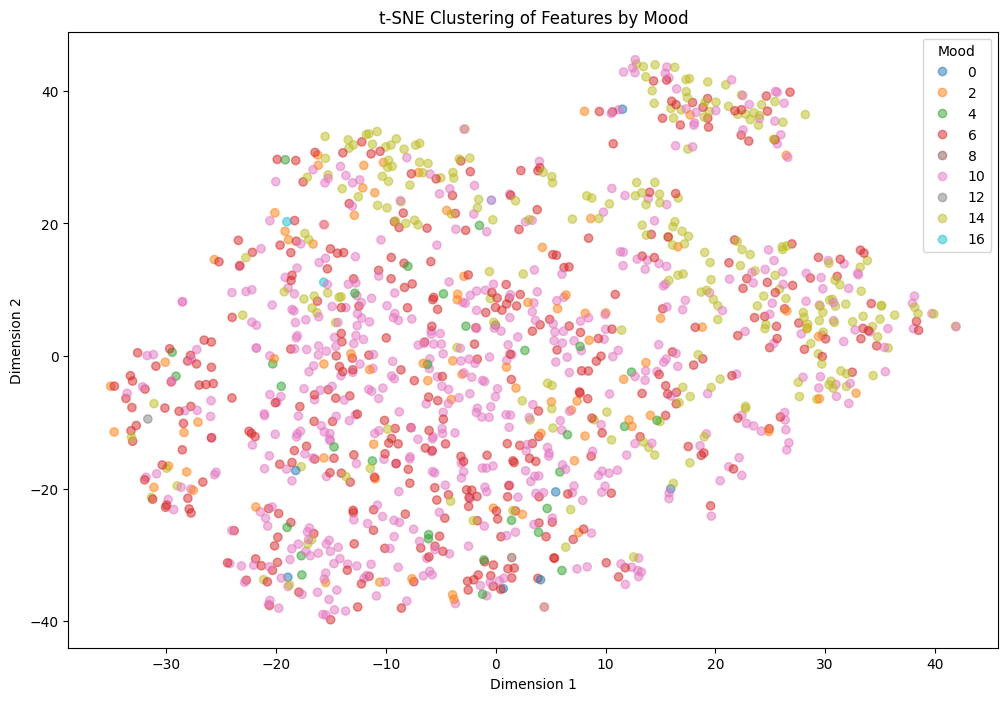

In [41]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_scaled)

# Create a DataFrame for visualization
df_tsne = pd.DataFrame(data={'Dimension 1': features_tsne[:, 0], 'Dimension 2': features_tsne[:, 1], 'Mood': target})

# Plot t-SNE clusters with a vibrant color map
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=df_tsne['Mood'], cmap='tab10', alpha=0.5)
plt.title('t-SNE Clustering of Features by Mood')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(*scatter.legend_elements(), title='Mood')
plt.show()

# k-Means Cluster Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


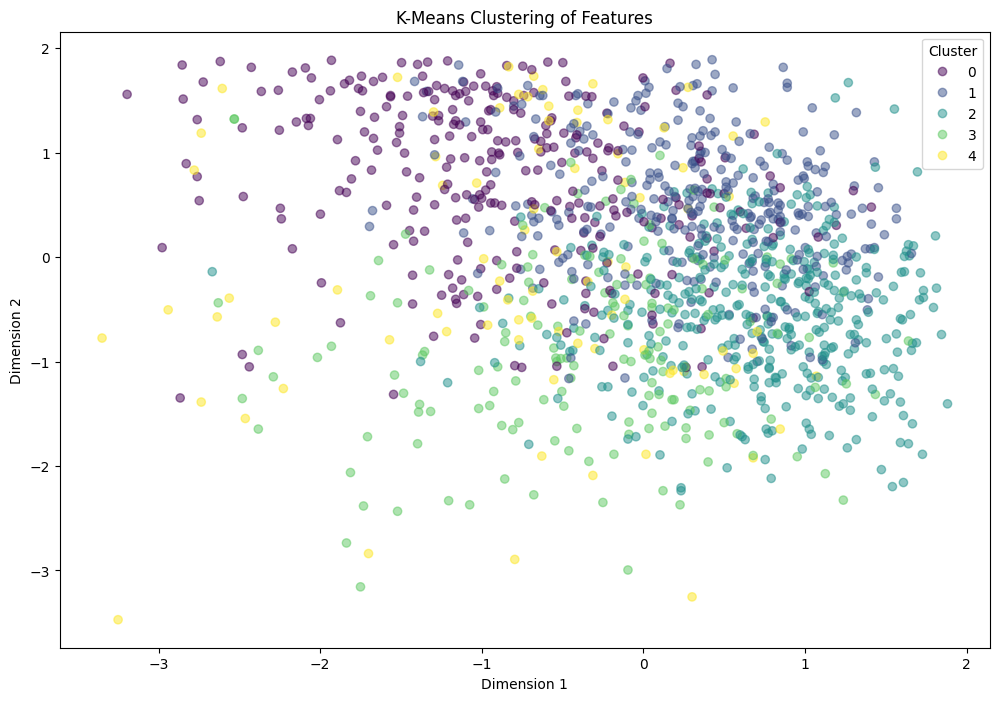

In [42]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Visualize the clusters
df_clusters = pd.DataFrame(data={'Dimension 1': features_scaled[:, 0], 'Dimension 2': features_scaled[:, 1], 'Cluster': clusters})

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clusters['Dimension 1'], df_clusters['Dimension 2'], c=df_clusters['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Features')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()